# Shower Fuzzy Inference System

In [1]:
import FuzzySystem as fs
import numpy as np

In [2]:
fis = fs.import_fis_matlab('shower.fis')
inputs = {'temp':12.05, 'flow':0.1687}
result = fis.eval(inputs)


Evaluation of FIS with inputs:
temp: 12.05
flow: 0.1687
	IF temp is cold and flow is soft THEN cold is openSlow and hot is openFast = 0 with weight = 1
Debug: fs 0
	IF temp is cold and flow is good THEN cold is closeSlow and hot is openSlow = 0 with weight = 1
Debug: fs 0
	IF temp is cold and flow is hard THEN cold is closeFast and hot is closeSlow = 0 with weight = 1
Debug: fs 0
	IF temp is good and flow is soft THEN cold is openSlow and hot is openSlow = 0.0 with weight = 1
Debug: fs 0.0
	IF temp is good and flow is good THEN cold is steady and hot is steady = 0.0 with weight = 1
Debug: fs 0.0
	IF temp is good and flow is hard THEN cold is closeSlow and hot is closeSlow = 0.0 with weight = 1
Debug: fs 0.0
	IF temp is hot and flow is soft THEN cold is openFast and hot is openSlow = 0 with weight = 1
Debug: fs 0
	IF temp is hot and flow is good THEN cold is openSlow and hot is closeSlow = 0.57825 with weight = 1
Debug: fs 0.57825
	IF temp is hot and flow is hard THEN cold is closeSlow

In [3]:
fis.show_rules()


Fuzzy System Rules:
IF temp is cold and flow is soft THEN cold is openSlow and hot is openFast
IF temp is cold and flow is good THEN cold is closeSlow and hot is openSlow
IF temp is cold and flow is hard THEN cold is closeFast and hot is closeSlow
IF temp is good and flow is soft THEN cold is openSlow and hot is openSlow
IF temp is good and flow is good THEN cold is steady and hot is steady
IF temp is good and flow is hard THEN cold is closeSlow and hot is closeSlow
IF temp is hot and flow is soft THEN cold is openFast and hot is openSlow
IF temp is hot and flow is good THEN cold is openSlow and hot is closeSlow
IF temp is hot and flow is hard THEN cold is closeSlow and hot is closeFast


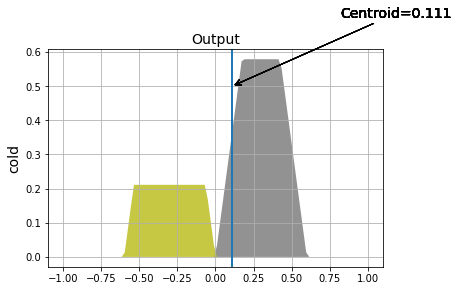

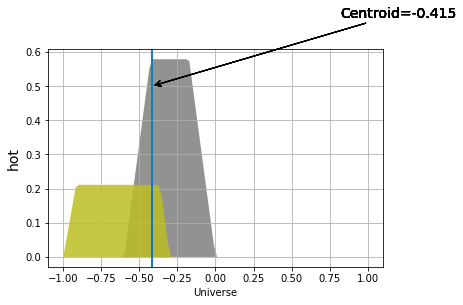

In [4]:
from FuzzySystem.Defuzzifier import Centroid
result.show(Centroid)

In [5]:
from FuzzySystem import matlab_importer as imp

In [6]:
def import_rules_matlab(rules, fis_inputs, fis_outputs):
    antecedent = []
    consequent = []
    for i, rule in enumerate(rules):
        #antecedent.append(Antecedent(conector=min))        
        #consequent.append(Consequent(conector=min))

        for j,a in enumerate(rule[0]):
            print(fis_inputs[j][int(a)-1])
        for j,c in enumerate(rule[1]):
            print(fis_outputs[j][int(c)-1])
    

In [7]:
def strip_array(array):
    return [text.strip() for text in array if text.strip()!=''] 

def read_rules_matlab(file=None, txt=None): 
    rules_array = []
    if file is not None:
        with open(file, 'r') as f:
            for text in f:
                rules, conection = text.split(':')
                ant, con = rules.split(',')
                ants = strip_array(ant.split(' '))
                cons = strip_array(con.split(' '))
                weights = cons[-1].strip().replace('(','').replace(')','')
                cons = cons[:-1]
                conection = conection.strip()
                rules_array.append((ants, cons, weights, conection))
    elif txt is not None:
        for text in txt:
            rules, conection = text.split(':')
            ant, con = rules.split(',')
            ants = strip_array(ant.split(' '))
            cons = strip_array(con.split(' '))
            weights = cons[-1].strip().replace('(','').replace(')','')
            cons = cons[:-1]
            conection = conection.strip()
            rules_array.append((ants, cons, weights, conection))
    else:
        return None
    return rules_array    

In [8]:
file = 'shower.fis'
conf = imp.read_fis_file(file)
parsed = imp.parse_fis_file(conf)
fis_input, fis_output = imp.get_io_fis(parsed) 
rules = read_rules_matlab(txt=conf['rules'])
#fis_rules = import_rules_matlab(rules, fis_input, fis_output)
#fis = FuzzyInferenceSystem(fis_rules, inputs=fis_input, outputs=fis_output)
#return fis 

In [9]:
rule_matrix = None
for i,r in enumerate(rules):
    inputs = np.array(r[0], dtype=np.int)
    outputs = np.array(r[1], dtype=np.int) 
    row = np.concatenate([inputs, outputs])
    row = np.append(row, int(r[2]))
    row = np.append(row, int(r[3]))
    if i==0:
        rule_matrix = np.array([row])
    else:
        rule_matrix = np.vstack([rule_matrix, row])
print(rule_matrix)

[[1 1 4 5 1 1]
 [1 2 2 4 1 1]
 [1 3 1 2 1 1]
 [2 1 4 4 1 1]
 [2 2 3 3 1 1]
 [2 3 2 2 1 1]
 [3 1 5 4 1 1]
 [3 2 4 2 1 1]
 [3 3 2 1 1 1]]


In [10]:
np_inputs = conf['system']['NumInputs']
np_outputs = conf['system']['NumOutputs']

In [11]:
inputs_params = []
for i in conf['inputs']:
    fv = []
    for fs in i['values']:
        fv = fv+fs[2]
    inputs_params.append(fv)
print(np.array(inputs_params))

[[-30.  -30.  -15.    0.  -10.    0.   10.    0.    0.   15.   30.   30. ]
 [ -3.   -3.   -0.8   0.   -0.4   0.    0.4   0.    0.    0.8   3.    3. ]]


In [12]:
outputs_params = []
for i in conf['outputs']:
    fv = []
    for fs in i['values']:
        fv = fv+fs[2]
    outputs_params.append(fv)
print(np.array(outputs_params))

[[-1.  -0.6 -0.3  0.  -0.6 -0.3  0.   0.  -0.3  0.   0.3  0.   0.   0.3
   0.6  0.   0.3  0.6  1.   0. ]
 [-1.  -0.6 -0.3  0.  -0.6 -0.3  0.   0.  -0.3  0.   0.3  0.   0.   0.3
   0.6  0.   0.3  0.6  1.   0. ]]


In [13]:
def f(x1, x0, a1, a2, a3): return x1*2*a1*a2*a3 + x0

In [14]:
f(2,1, 2, 2, 2)

33

In [15]:
a = [2,2,2]
x = [2,1]
f(*x,*a)

33

In [16]:
a = (('z', 1), ('b',2))

In [17]:
x,y = zip(*a)

In [18]:
print(x)
print(y)

('z', 'b')
(1, 2)
